In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
file_path = 'data/'+'qs_visualDurEstimate_2025-03-07_16h17.42.161.csv'
#'av_auditory_dur_estimate_bin_stair_2025-02-17_22h23.26.857.csv'
#'oy_auditory_dur_estimate_bin_stair_2025-02-14_23h33.11.062.csv'
#lc_auditory_dur_estimate_bin_stair_2025-02-12_18h28.56.655.csv'
#ln_001_auditory_dur_estimate_bin_stair_2025-02-07_12h45.18.556.csv'
#oy_001_auditory_dur_estimate_bin_stair_2025-02-07_00h02.46.951.csv'
#lc_auditory_dur_estimate_bin_stair_202
# 5-01-31_14h50.37.771.csv'
#oy_35_auditory_dur_estimate_bin_stair_2025-02-06_16h21.22.562.csv'
#_auditory_dur_estimate_bin_stair_2025-02-05_20h59.05.115.csv'
#oy_ampVar_35_auditory_dur_estimate_bin_stair_2025-02-05_14h18.49.653.csv'
#ln_auditory_dur_estimate_bin_stair_2025-02-05_15h01.25.318.csv'
#oy_ampVar_35_auditory_dur_estimate_bin_stair_2025-02-05_14h18.49.653.csv'
#lc_auditory_dur_estimate_bin_stair_2025-02-04_15h43.21.906.csv'
#IP_auditory_dur_estimate_bin_stair_2025-02-03_15h10.22.718.csv'
#lc_auditory_dur_estimate_bin_stair_2025-01-31_14h50.37.771.csv'
#oy_bin_stair_auditory_dur_estimate_bin_stair_2025-01-26_14h23.52.919.csv'
#_auditory_dur_estimate_2025-01-26_13h31.27.315.csv' again const
#_auditory_dur_estimate_2025-01-26_01h24.23.874.csv' method of constant
#_auditory_dur_estimate_2025-01-25_23h28.04.509.csv'
#_auditory_dur_estimate_2025-01-22_20h53.18.927.csv'
#_auditory_dur_estimate_2025-01-22_16h43.58.121.csv'
data = pd.read_csv(file_path)
data['chose_test'] = (data['responses'] == data['order']).astype(int)
data

,Unnamed: 0,standardDur,riseDur,order,preDur,postDur,isiDur,trial_num,total_audio_dur,delta_dur_percents,...,testDurS,intensities,current_stair,responses,is_correct,response_rts,stair_num_reversal,stair_is_reversal,response_keys,chose_test
0,0,0.5,0.85,1,0.4833,0.4167,0.6500,0,2.8833,0.6500,...,0.8333,5,2D1U,1.0,True,4.735,0,False,left,1
1,1,0.5,0.85,1,0.4833,0.4667,0.8500,1,2.4667,-0.6500,...,0.1667,5,2U1D,2.0,True,0.484,0,False,right,0
2,2,0.5,0.10,1,0.5833,0.4000,0.7667,2,2.4167,-0.6500,...,0.1667,5,3U1D,2.0,True,0.434,0,False,right,0
3,3,0.5,0.10,1,0.5000,0.4833,0.7333,3,2.3833,-0.6500,...,0.1667,5,2U1D,2.0,True,0.470,0,False,right,0
4,4,0.5,0.85,2,0.6000,0.5667,0.7000,4,2.4667,-0.8000,...,0.1000,5,lapse_rate,1.0,True,0.450,0,False,left,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,0.5,0.85,1,0.5833,0.5833,0.7167,203,2.5166,-0.7200,...,0.1333,5,2U1D,2.0,True,0.265,11,False,right,0
204,204,0.5,0.85,2,0.5333,0.5500,0.8000,204,2.6166,-0.5180,...,0.2333,5,3U1D,1.0,True,1.011,9,True,left,0
205,205,0.5,0.85,2,0.5333,0.4500,0.8167,205,3.1000,0.5840,...,0.8000,5,2D1U,1.0,False,0.601,12,False,left,0
206,206,0.5,0.10,2,0.5333,0.6000,0.6333,206,2.4499,-0.6302,...,0.1833,5,2U1D,1.0,True,0.433,12,True,left,0


KeyError: 'standard_dur'

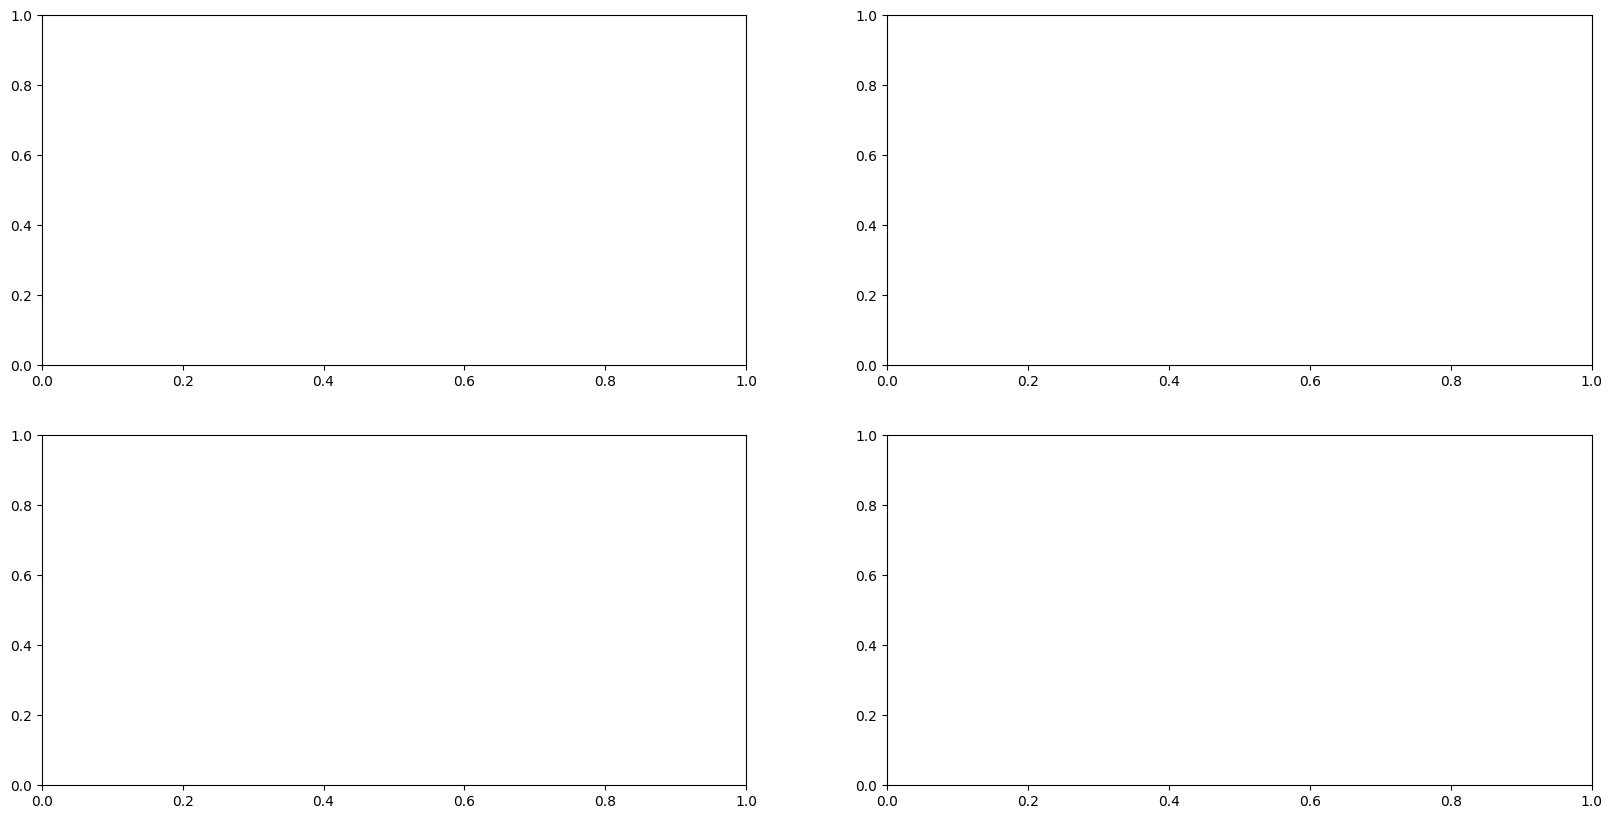

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
df=data.copy()
#data=df[df['rise_dur'] == 0.2].reset_index(drop=True)
data_standard = data[data['standard_dur'] == 1].reset_index(drop=True)
#data=data[data['rise_dur'] == 0.2].reset_index(drop=True)
# Define the stair types and titles
stair_types = ['3U1D', '3D1U', '3U1Db', '3D1Ub', 'lapse_rate']
stair_types = ['3U1D', '3D1U', '2U1D', '2D1U', 'lapse_rate']

#titles = ['3 Up 1 Down', '3 Down 1 Up',"High uncertainty 3U1D", np.unique(data['rise_dur'])[1],]

titles = ['Low uncertainty 3U1D', 'Low uncertainty 3D1U',"High uncertainty 3U1D", "High uncertainty 3D1U"]

# Plot each stair type in a subplot
for ax, stair_type, title in zip(axs.flatten(), stair_types, titles):
    df_stair = data[data['current_stair'] == stair_type].reset_index(drop=True)
    sns.lineplot(x=df_stair.index, y='delta_dur_percents', data=df_stair, marker='o', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Trial')
    ax.set_ylabel('Delta Duration (%)')
    #ax.set_ylim(-1, 1)


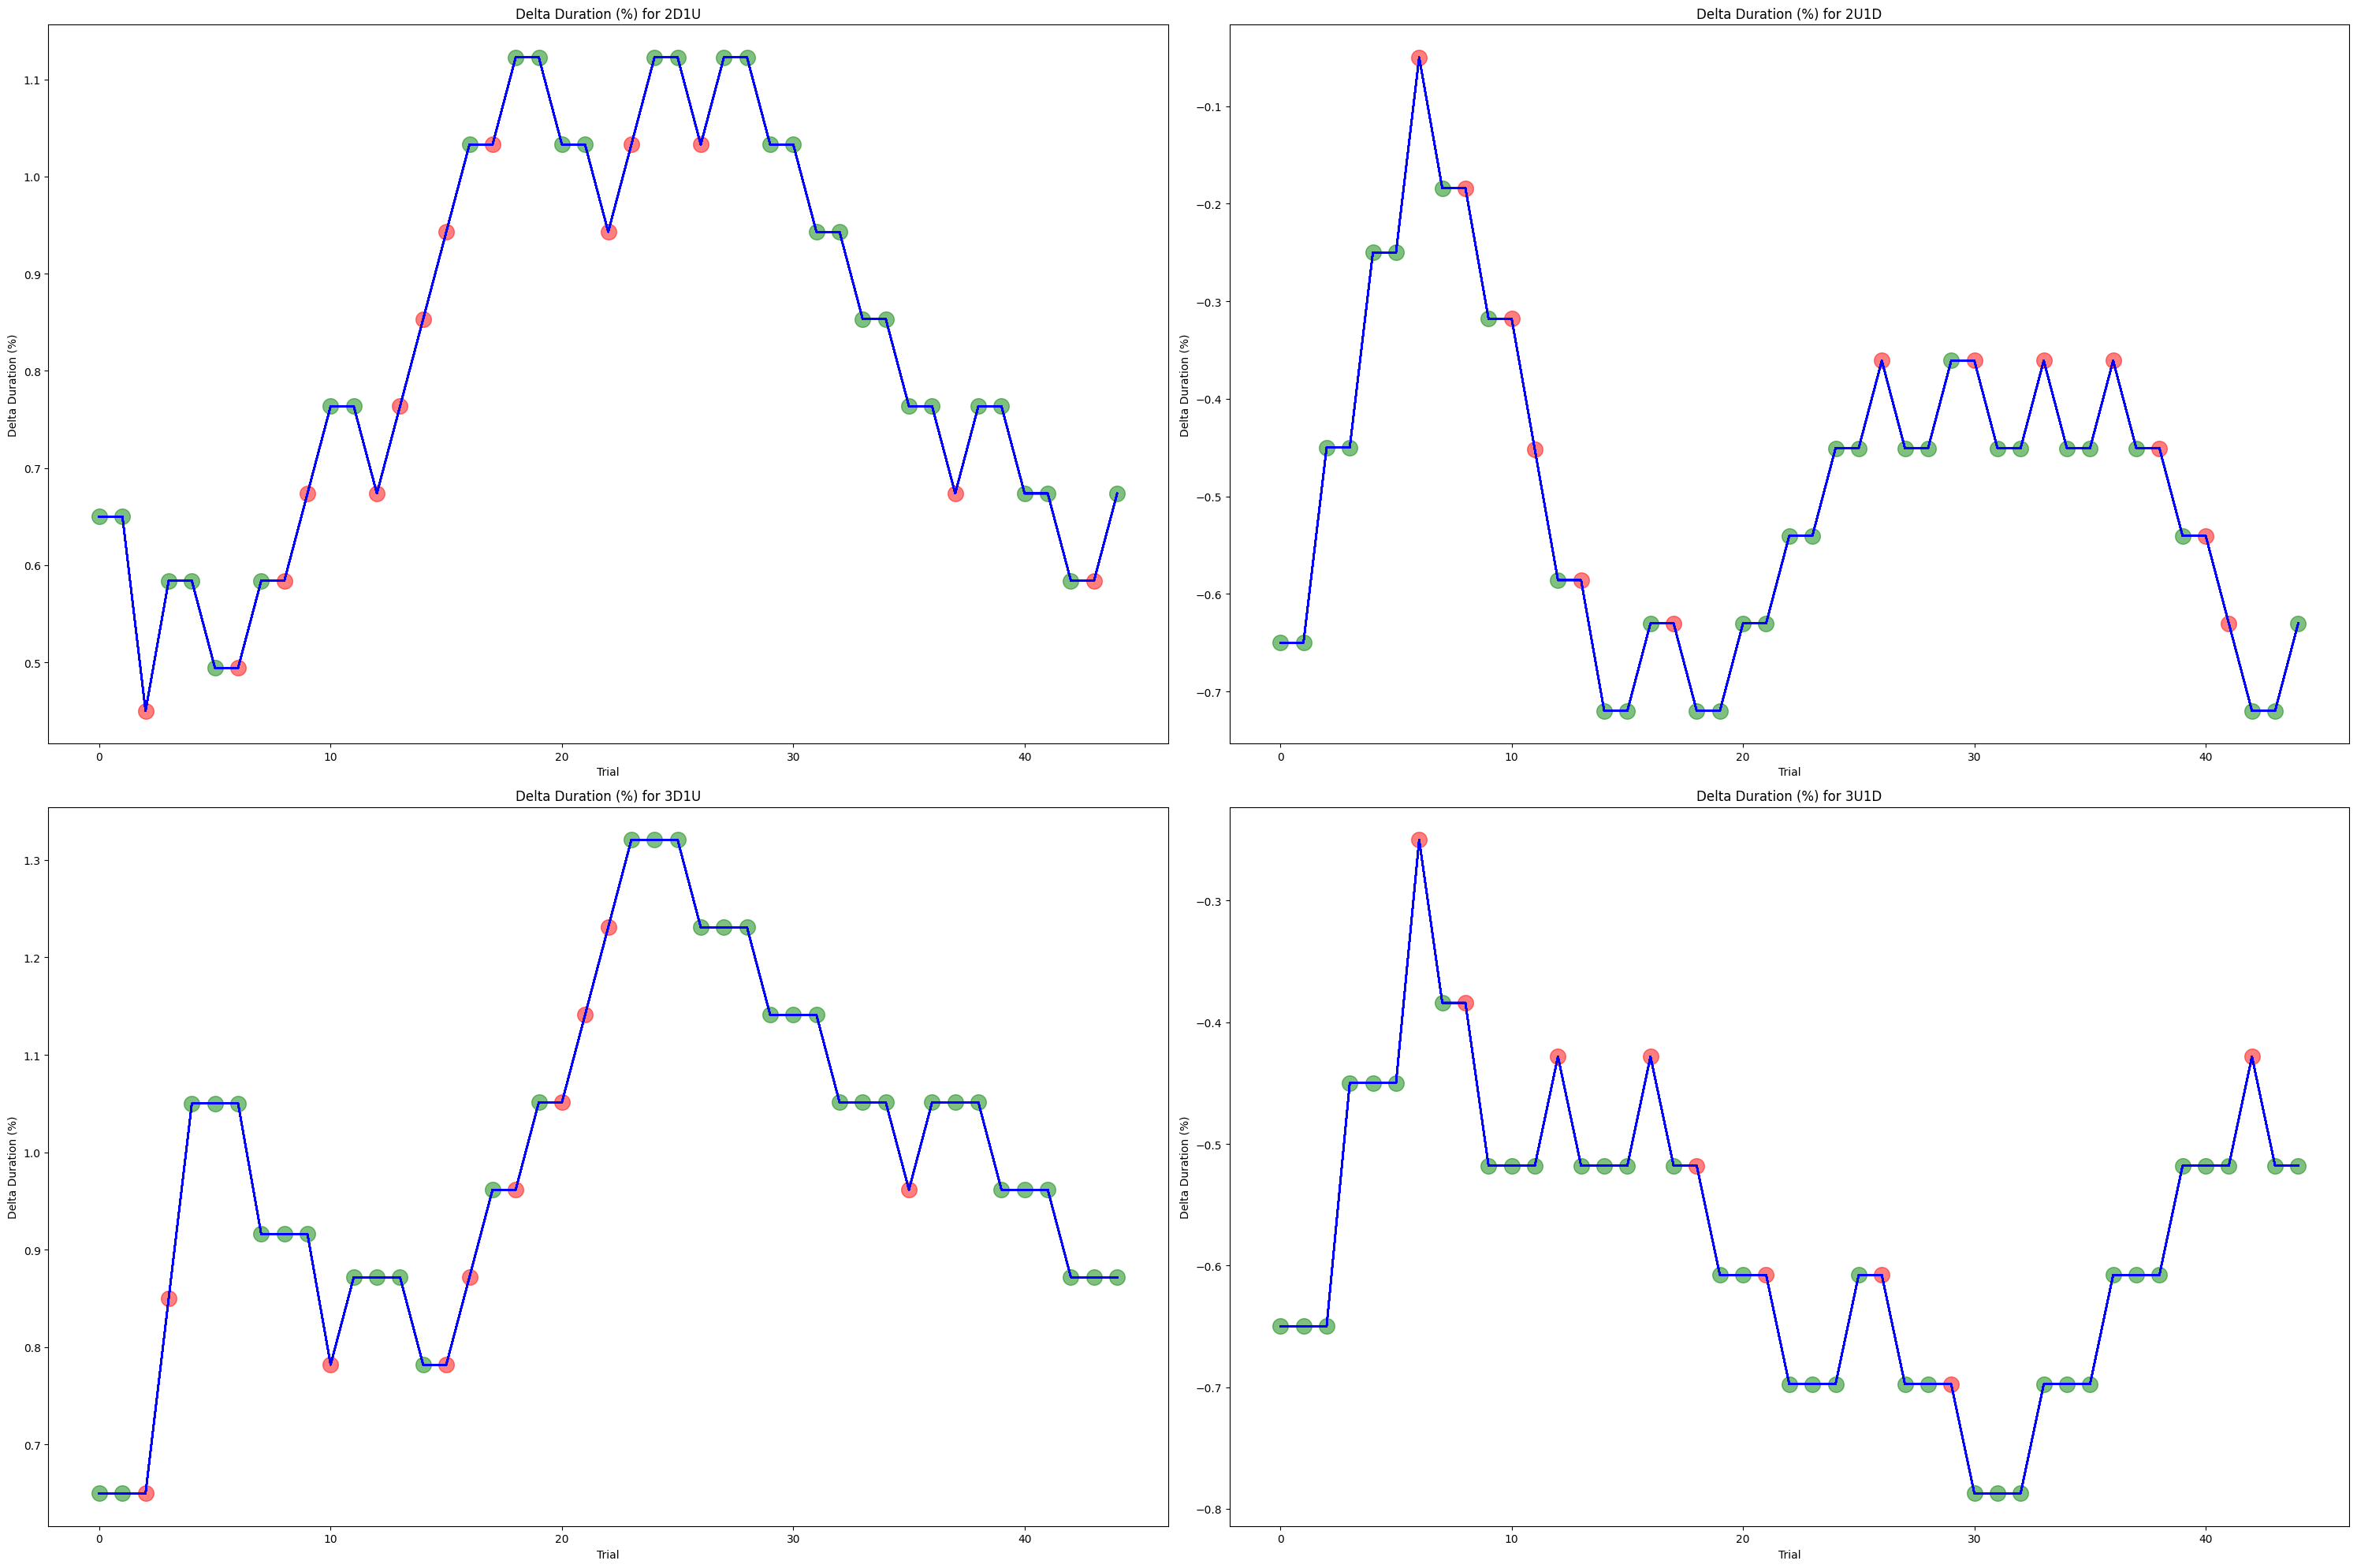

In [4]:
a=data['current_stair'].unique().tolist()
a.sort()
a=a[:-1]# plot each trial delta dur seperately
plt.figure(figsize=(30,20))
for idx,stair in enumerate(a):
    df = data[data['current_stair'] == stair].reset_index(drop=True)
    plt.subplot(2,2,idx+1)
    for trialN in range(len(df)):
        color = 'green' if df['is_correct'][trialN] == 1 else 'red'
        plt.scatter(trialN, df['delta_dur_percents'][trialN], color=color, s=200, alpha=0.5)
        plt.plot(df['delta_dur_percents'], color='blue')
        plt.title(f'Delta Duration (%) for {stair}')

        plt.xlabel('Trial')
        plt.ylabel('Delta Duration (%)')
    
plt.tight_layout()
plt.show()



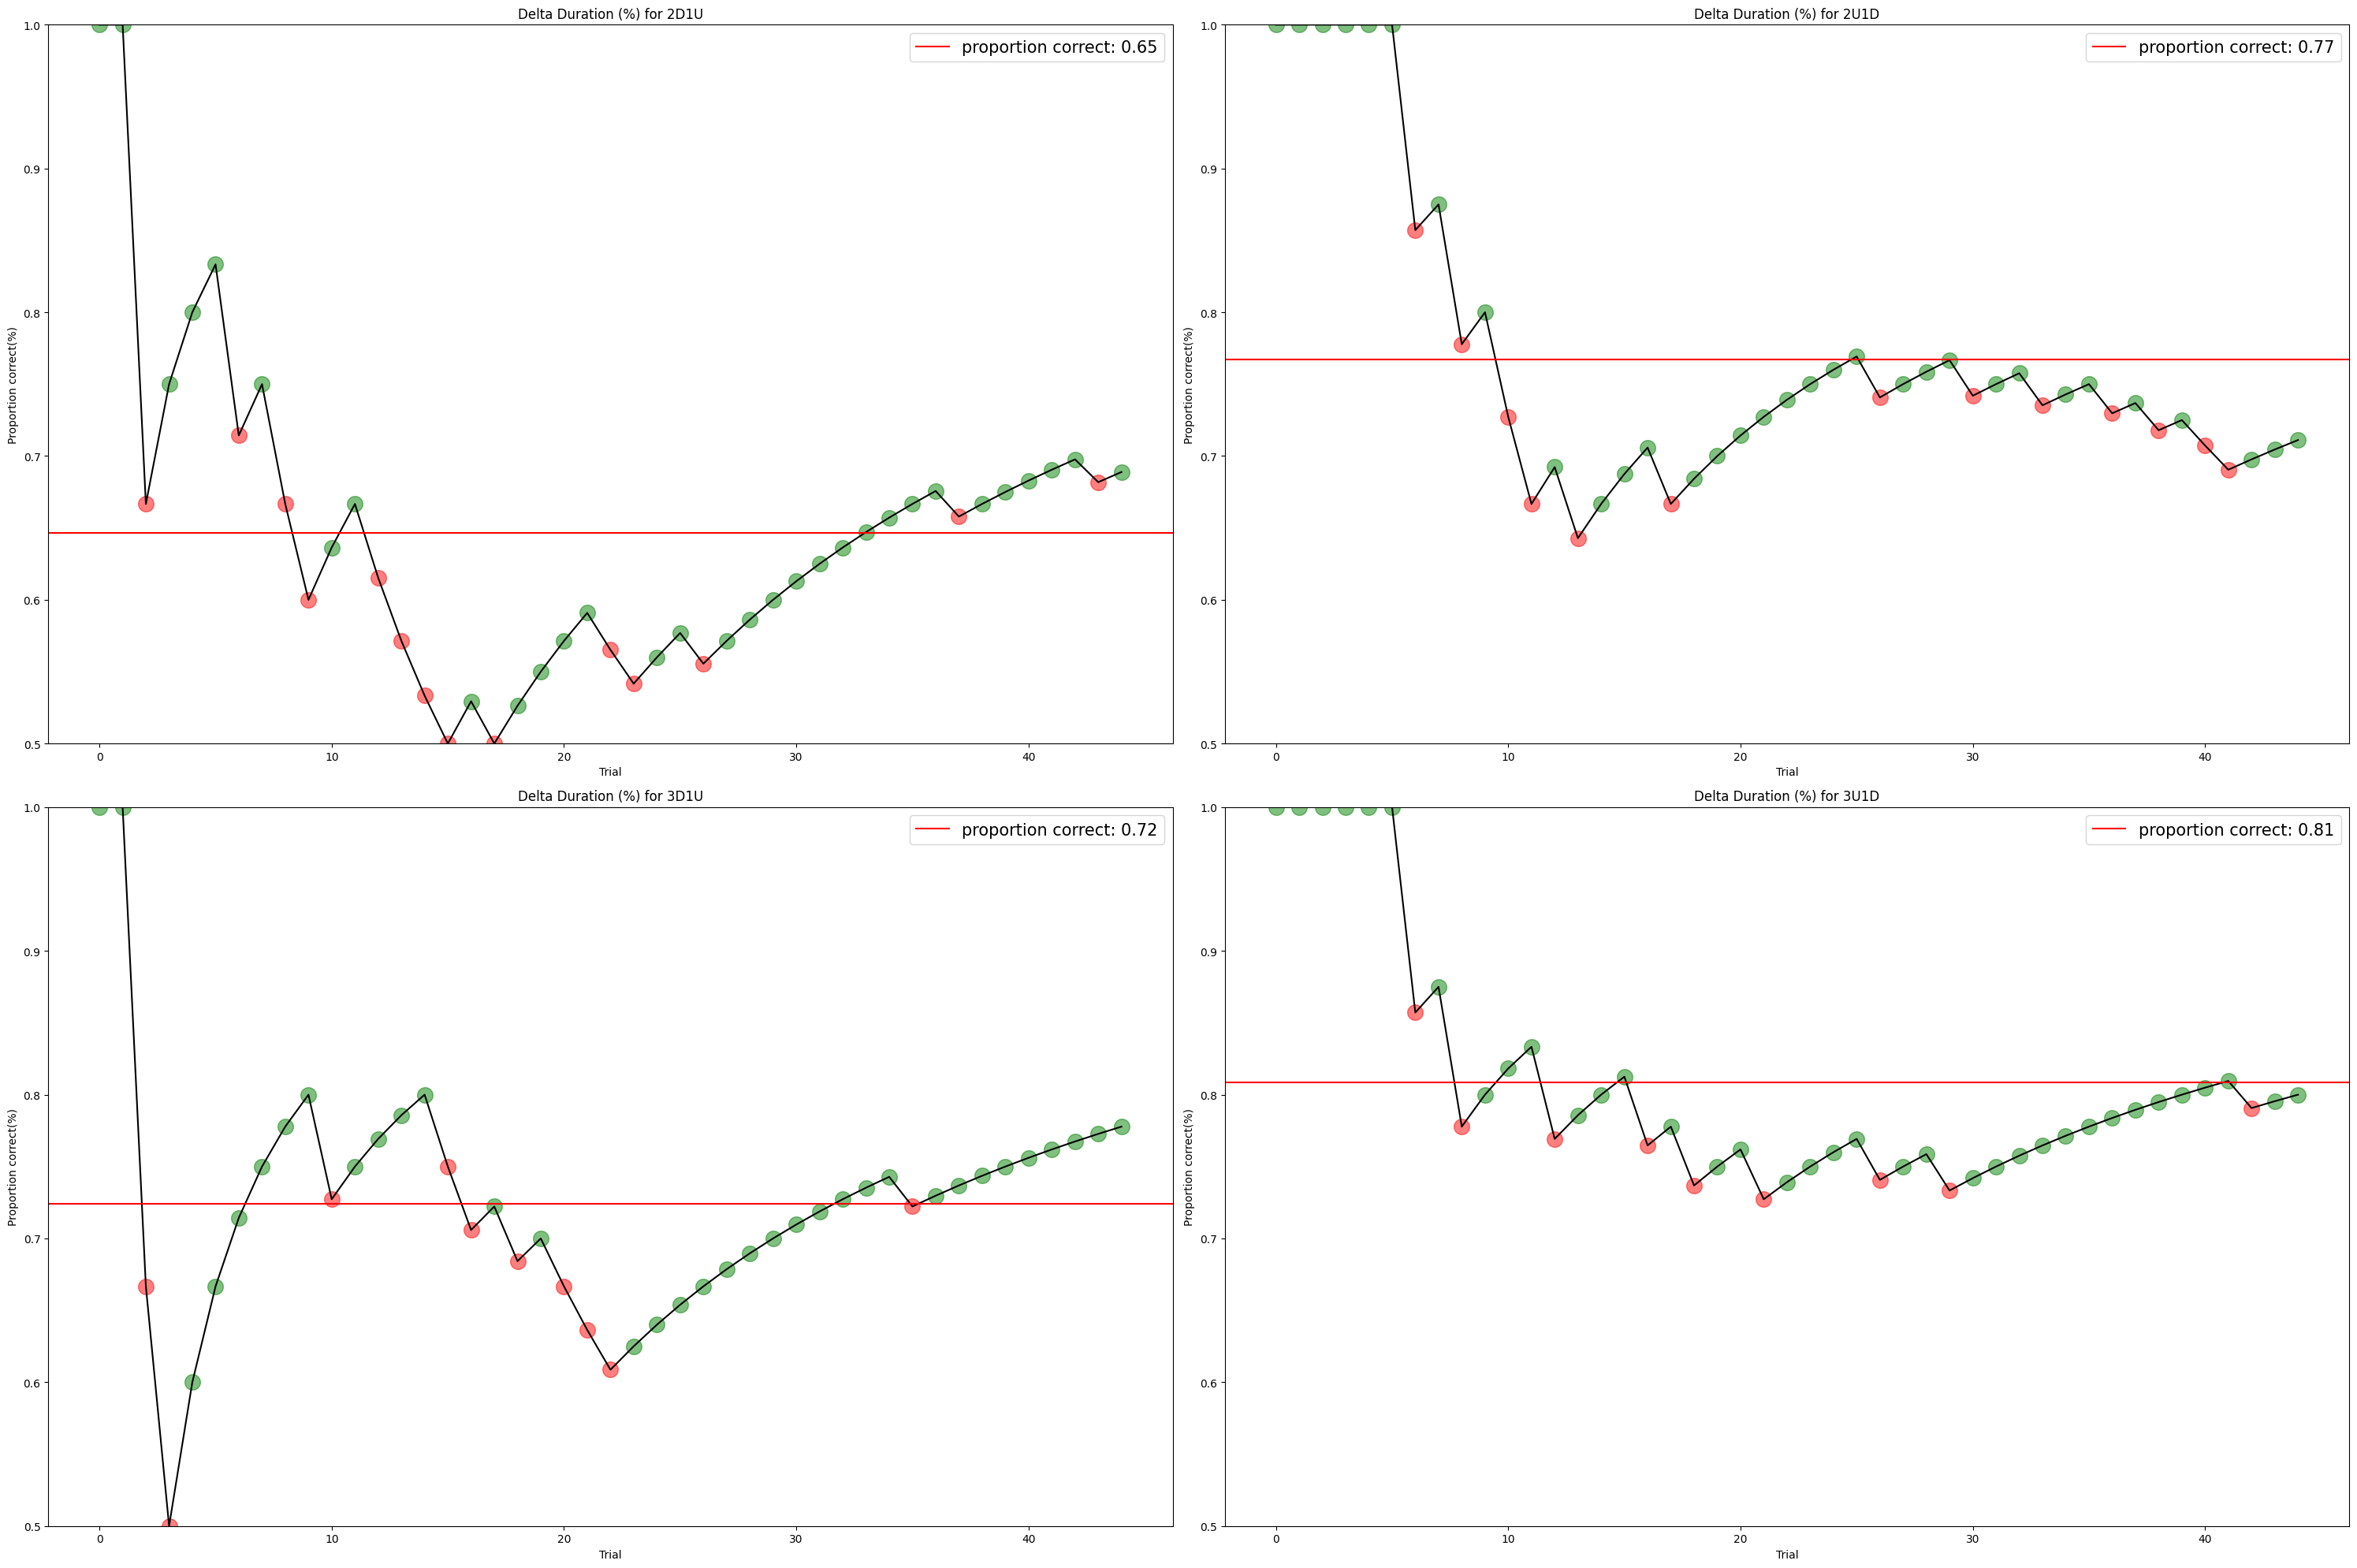

In [5]:
a=data['current_stair'].unique().tolist()
a.sort()
a=a[:-1]# plot each trial delta dur seperately
plt.figure(figsize=(30,20))
for idx,stair in enumerate(a):
    df = data[data['current_stair'] == stair].reset_index(drop=True)
    plt.subplot(2,2,idx+1)
    pCorrectsEvvolution = []
    for trialN in range(len(df)):
        color = 'green' if df['is_correct'][trialN] == 1 else 'red'
        #plt.scatter(trialN, df['delta_dur_percents'][trialN], color=color, s=200, alpha=0.5)
        plt.scatter(trialN, df["is_correct"][:trialN+1].mean(), color=color, s=200, alpha=0.5)

        #print(f'proportion correct until trial {trialN}: {df["is_correct"][:trialN+1].mean()}')
        pCorrectsEvvolution.append(df["is_correct"][:trialN+1].mean())
        #plt.scatter(trialN,df["is_correct"][:trialN+1].mean(),color='black')
        #plt.plot(df['delta_dur_percents'], color='blue')
        plt.title(f'Delta Duration (%) for {stair}')

        plt.xlabel('Trial')
        plt.ylabel('Proportion correct(%)')
    plt.plot(pCorrectsEvvolution, color='black')
    plt.axhline(np.mean(pCorrectsEvvolution), color='red', linestyle='-', label=f'proportion correct: {np.mean(pCorrectsEvvolution):.2f}')
    plt.ylim(0.5, 1)
    plt.legend(fontsize=15)
plt.tight_layout()

plt.show()



TypeError: 'Axes' object is not subscriptable

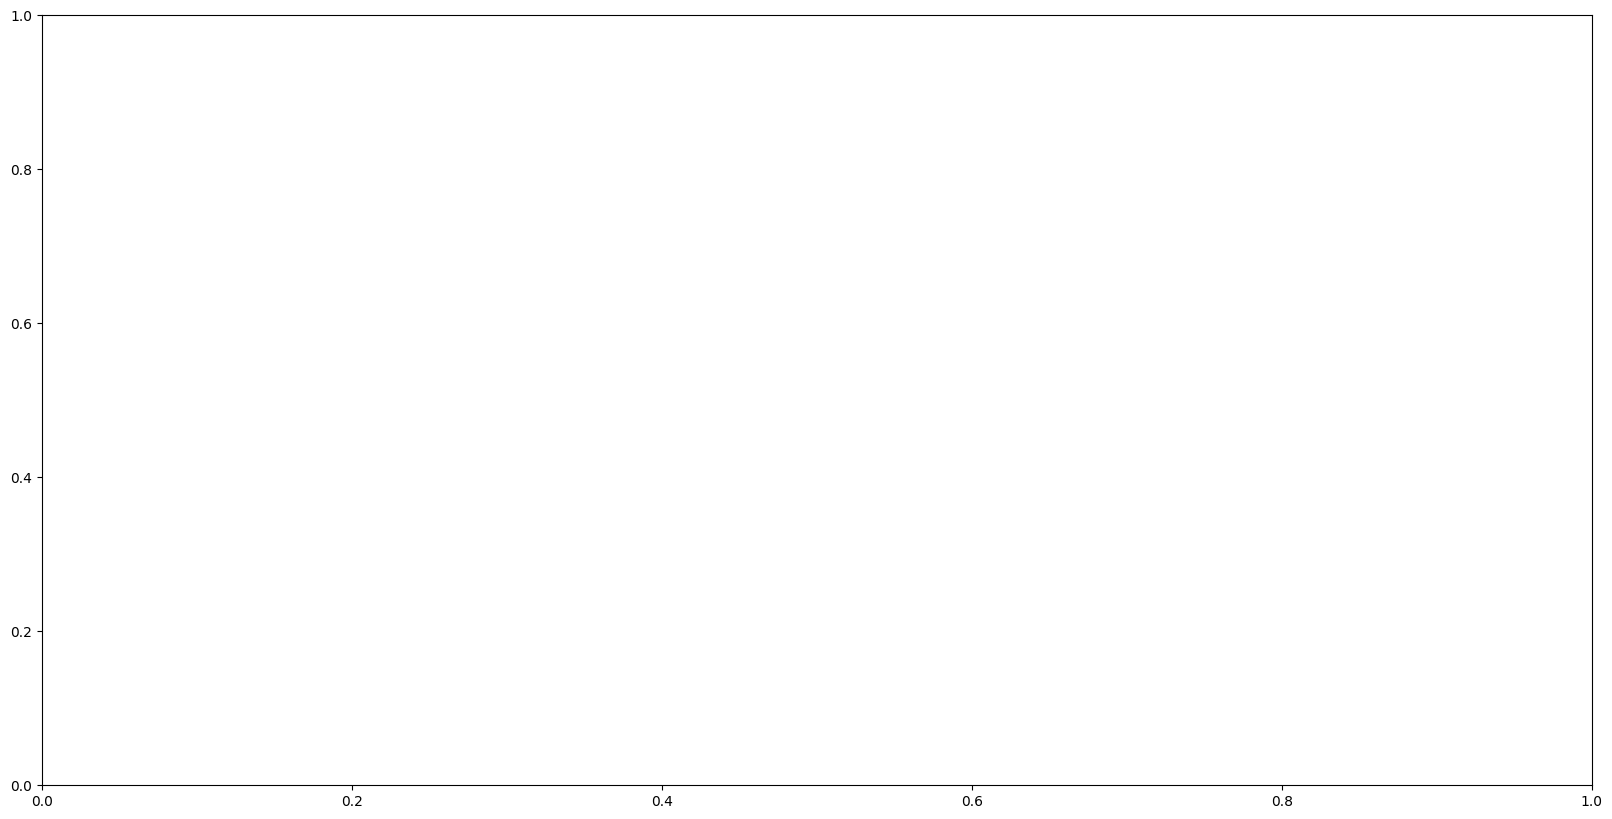

In [ ]:
#plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(1,1, figsize=(20, 10))
for trial in np.unique(data['current_stair']):
    df_stair = data[data['current_stair'] == trial].reset_index(drop=True)
    sns.lineplot(x=df_stair.index, y='delta_dur_percents', data=df_stair, marker='o', ax=axs[1, 1])
    axs[1, 1].set_title('All Stair Types')
    axs[1, 1].set_xlabel('Trial')
    axs[1, 1].set_ylabel('Delta Duration (%)')
    #axs[1, 1].set_ylim(-1, 1)
plt.tight_layout()
plt.show()

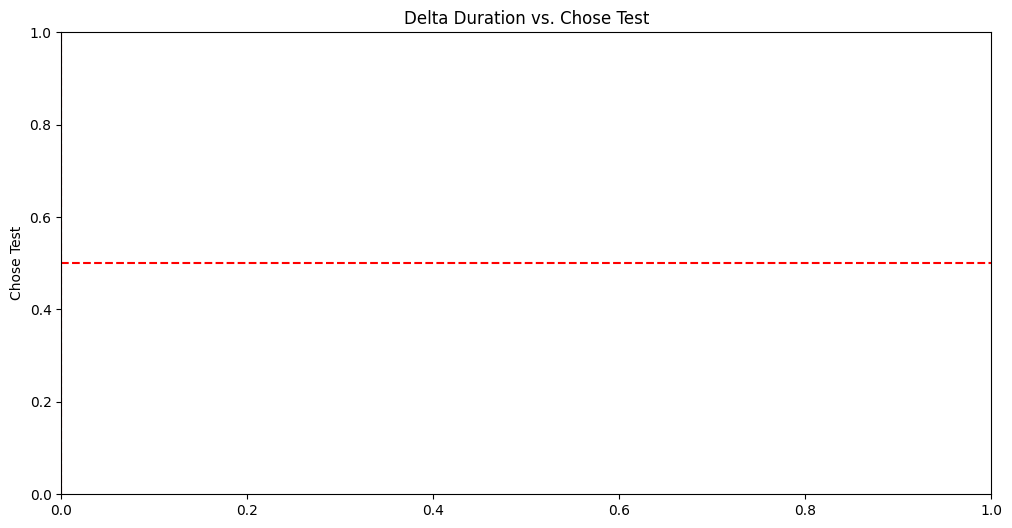

In [ ]:
plt.figure(figsize=(12, 6))
data_filtered = data[data['rise_dur'] == 3.5]
#sns.lineplot(x='delta_dur_percents', y='chose_test', data=data_filtered, marker='o')
sns.scatterplot(x='delta_dur_percents', y='chose_test', data=data_filtered, hue='is_correct',) # Vary size by 'is_correct'
plt.title('Delta Duration vs. Chose Test')
#plt.xlabel('Trial')
plt.ylabel('Chose Test')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=0, color='r', linestyle='--')

plt.show()

In [ ]:
mean_correct_3D1U = round(data[data['current_stair'] == "3D1U"]['is_correct'].mean(),3)
mean_correct_3U1D = round(data[data['current_stair'] == "3U1D"]['is_correct'].mean(),3)
mean_correct_2D1U = round(data[data['current_stair'] == "3D1Ub"]['is_correct'].mean(),3)
mean_correct_2U1D = round(data[data['current_stair'] == "3U1Db"]['is_correct'].mean(),3)

print(f'mean of correct responses for 3D1U trials is {mean_correct_3D1U}')
print(f'mean of correct responses for 3d1ub trials is {mean_correct_2D1U}')
print(f'mean of correct responses for 3U1D trials is {mean_correct_3U1D}')
print(f'mean of correct responses for 3u1db trials is {mean_correct_2U1D}')

